In [1]:
import CustomProcessingV3

In [2]:
train_path = "Data/train/"
test_path = "Data/val/"

In [3]:

numberOfClass,train_data,test_data = CustomProcessingV3.class_number_and_data(train_path,test_path,augmentation=True)

Found 3770 images belonging to 7 classes.
Found 420 images belonging to 7 classes.


In [ ]:
CustomProcessingV3.sample_visulization(train_path)

In [ ]:
CustomProcessingV3.sample_visulization(test_path)

In [4]:
modelefficientnet=CustomProcessingV3.model_create(numberOfClass)



16705208/16705208 [==============================] - 3s 0us/step



In [5]:
batch_size = 32
checkpoint_best,checkpoint_last = CustomProcessingV3.creat_checkpoint("efficientnet")
hist_efficientnet = modelefficientnet.fit_generator(train_data, validation_data=test_data, epochs=8, callbacks=[checkpoint_best, checkpoint_last])

C:\Users\anas malkawi\AppData\Local\Temp\ipykernel_25880\1220939064.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist_efficientnet = modelefficientnet.fit_generator(train_data, validation_data=test_data, epochs=8, callbacks=[checkpoint_best, checkpoint_last])


Epoch 1/8


118/118 [==============================] - ETA: 0s - loss: 0.5163 - accuracy: 0.8326
Epoch 1: val_loss improved from inf to 5.62879, saving model to ./models\best_efficientnet.h5


c:\Users\anas malkawi\Desktop\tahaluf task\New folder\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: saving model to ./models\last_efficientnet.h5
118/118 [==============================] - 797s 6s/step - loss: 0.5163 - accuracy: 0.8326 - val_loss: 5.6288 - val_accuracy: 0.1190
Epoch 2/8
118/118 [==============================] - ETA: 0s - loss: 0.2390 - accuracy: 0.9228
Epoch 2: val_loss improved from 5.62879 to 2.69247, saving model to ./models\best_efficientnet.h5

Epoch 2: saving model to ./models\last_efficientnet.h5
118/118 [==============================] - 645s 5s/step - loss: 0.2390 - accuracy: 0.9228 - val_loss: 2.6925 - val_accuracy: 0.1429
Epoch 3/8
118/118 [==============================] - ETA: 0s - loss: 0.1694 - accuracy: 0.9485
Epoch 3: val_loss did not improve from 2.69247

Epoch 3: saving model to ./models\last_efficientnet.h5
118/118 [==============================] - 604s 5s/step - loss: 0.1694 - accuracy: 0.9485 - val_loss: 4.5322 - val_accuracy: 0.1429
Epoch 4/8
118/118 [==============================] - ETA: 0s - loss: 0.1589 - accuracy: 0.9496
Epoch 

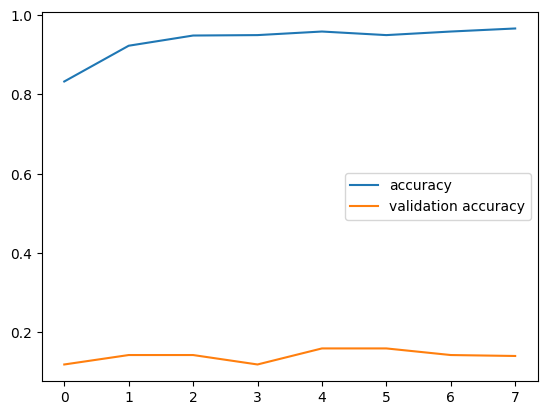

In [6]:
CustomProcessingV3.accuracy_plt(hist_efficientnet)

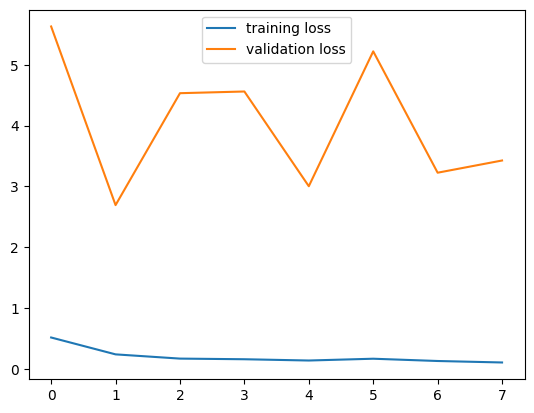

In [7]:
CustomProcessingV3.loss_plt(hist_efficientnet)

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf


model = load_model('models\last_efficientnet.h5')

data_directory = 'Data/val'
class_names = os.listdir(data_directory)

images = []
true_labels = []
def preprocess_image(path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 

    return img_array

for class_name in class_names:
    class_path = os.path.join(data_directory, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        image = tf.keras.preprocessing.image.img_to_array(image)/255
        
        images.append(image)

        true_labels.append(class_name)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
true_labels_numeric = label_encoder.fit_transform(true_labels)


predictions = model.predict(np.array(images))
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(true_labels_numeric, predicted_labels)
precision = precision_score(true_labels_numeric, predicted_labels, average='weighted')
recall = recall_score(true_labels_numeric, predicted_labels, average='weighted')
f1 = f1_score(true_labels_numeric, predicted_labels, average='weighted')

conf_matrix = confusion_matrix(true_labels_numeric, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_report = classification_report(true_labels_numeric, predicted_labels, target_names=class_names)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

print('\nClassification Report:')
print(class_report)